<a href="https://colab.research.google.com/github/hussain0048/C-Plus-Plus/blob/master/ANN_Based_Cardiovascular_Disease_Diagnostic_Model_By_Using_LMO_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Preprocessing</a></li>
         <li><a href="#pre-processing">Data Spliting </a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
        <li><a href="#evaluation"> Classification Model Training and Evaluation
        <ul>
        <li><a href="#evaluation">Decision Trees</a></li>
        <li><a href="#evaluation">Random Forest</a></li>
        <li><a href="#evaluation">Support Vector Machine</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
         <li><a href="#evaluation">Compare Model performance</a></li>
         <li><a href="#evaluation">Pipelines</a></li>
         <li><a href="#evaluation">Ensemble techniques</a></li>
         <li><a href="#evaluation"> Regression Model Training and Evaluation
    </ul>
</div>
<br>
<hr>


# **1- Introduction**

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **Import libaray**

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **2- Data Loading**

## **Data Loading from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
Train_data = pd.read_csv('/content/drive/MyDrive/Research /Research Papers/ARTIFICIAL NEURAL NETWORK-BASED CARDIOVASCULAR DISEASE DIAGNOSTIC MODEL BY USING LEVENBERG-/dataset/cardio_train.csv',encoding = 'latin')

In [6]:
Train_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [8]:
target_column = ['cardio']
predictors = list(set(list(Train_data.columns))-set(target_column))
Train_data[predictors] = Train_data[predictors]/Train_data[predictors].max()
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,0.499729,0.288516,0.000000,0.250070,0.500020,0.748900,1.0
age,70000.0,0.821021,0.104046,0.455362,0.744908,0.830894,0.899380,1.0
gender,70000.0,0.674786,0.238419,0.500000,0.500000,0.500000,1.000000,1.0
height,70000.0,0.657437,0.032841,0.220000,0.636000,0.660000,0.680000,1.0
weight,70000.0,0.371028,0.071979,0.050000,0.325000,0.360000,0.410000,1.0
ap_hi,70000.0,0.008041,0.009614,-0.009363,0.007491,0.007491,0.008739,1.0
ap_lo,70000.0,0.008785,0.017134,-0.006364,0.007273,0.007273,0.008182,1.0
cholesterol,70000.0,0.455624,0.226750,0.333333,0.333333,0.333333,0.666667,1.0
gluc,70000.0,0.408819,0.190757,0.333333,0.333333,0.333333,0.333333,1.0
smoke,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.0


# **3- Preprocessing**

# **3- Data spliting**

In [9]:
MiceImputed=Train_data

In [10]:
X=MiceImputed.drop('cardio',axis=1)

In [11]:
y=MiceImputed[['cardio']]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **11- Classification Model Training and Evaluation**

We will train a model over a set of training data, providing it a machine-learning algorithm that it can learn from those data and predict future data.

![](https://drive.google.com/uc?export=view&id=1_Qov2L2cAZzFKcf5UY3bMc6ITdnpKfkJ)

## **11.1-Decision Trees**

### **Model Training**

In [13]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC_Model= DTC.fit(X_train , y_train)
DTC_Model

DecisionTreeClassifier(max_depth=2, random_state=0)

###**Model evaluation**

**Predict Class Probability**

In [14]:
preds_proba = DTC_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.16069714 0.83930286]
 [0.55714674 0.44285326]
 [0.76172377 0.23827623]
 ...
 [0.55714674 0.44285326]
 [0.55714674 0.44285326]
 [0.40183627 0.59816373]]


**Accuracy**

In [15]:
y_pred_DT = DTC.predict(X_test)
DT_Acc=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.7107


**Confusion Matrix**



confusion matrix


[[8385 2059]
 [4017 6539]]




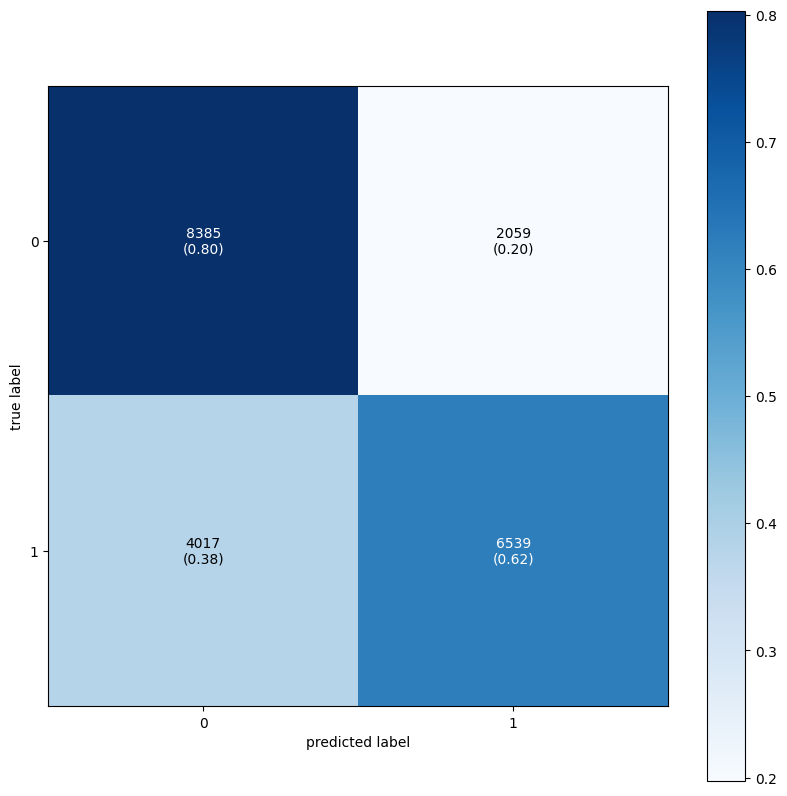

In [18]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred_DT)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [19]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred_DT)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.68      0.80      0.73     10444
           1       0.76      0.62      0.68     10556

    accuracy                           0.71     21000
   macro avg       0.72      0.71      0.71     21000
weighted avg       0.72      0.71      0.71     21000





**ROC CURVE**

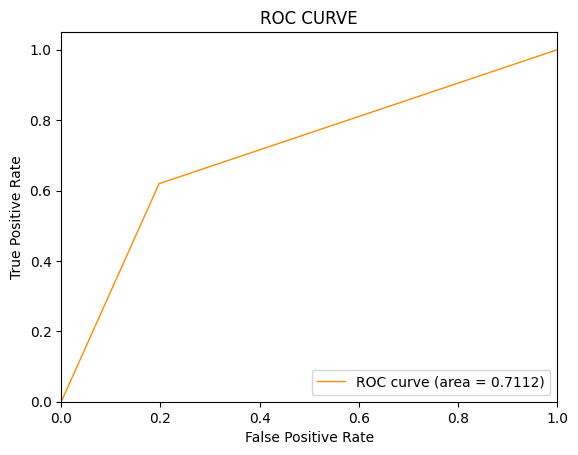

In [20]:
from sklearn.metrics import roc_curve, auc
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, y_pred_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_DT)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##**11.2-Random Forest**

### **Model training**

In [21]:
from sklearn.ensemble import RandomForestClassifier


In [22]:
RF= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
RF_model= RF.fit(X_train , y_train)
RF_model

RandomForestClassifier(max_depth=15, max_leaf_nodes=10, random_state=11)

### **Model evaluation**

**Predict Class Probability**

In [23]:
preds_proba = RF_model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.24818567 0.75181433]
 [0.60627299 0.39372701]
 [0.66112198 0.33887802]
 ...
 [0.53483205 0.46516795]
 [0.57426885 0.42573115]
 [0.36477529 0.63522471]]


**Accuracy**

In [24]:
y_pred_RF = RF_model.predict(X_test)
RF_Acc=RF_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(RF_model.score(X_test, y_test)))

Accuracy score= 0.7230


**Confusion Matrix**

In [25]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[8082 2362]
 [3454 7102]]




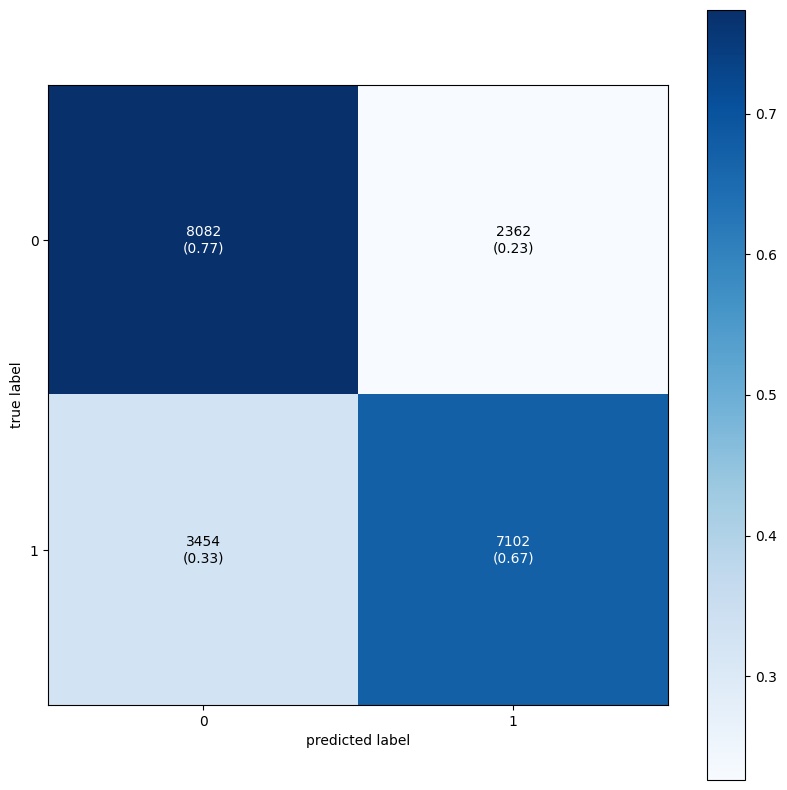

In [26]:
print('\n')
print("confusion matrix")
print('\n')
CR_RF=confusion_matrix(y_test, y_pred_RF)
print(CR_RF)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_RF,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [27]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_RF=classification_report(y_test, y_pred_RF)
print(CR_RF)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.70      0.77      0.74     10444
           1       0.75      0.67      0.71     10556

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000





**ROC CURVE**

In [28]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_RF)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.3-SVM Support Vector Machine**

### **Model Training**

In [30]:
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
import sklearn.svm


In [31]:

#svc=svm.LinearSVC()
svc = sklearn.svm.SVC(kernel='linear', C=1.0)

SVM_Model= svc.fit(X_train , y_train)
SVM_Model

SVC(kernel='linear')

### **Model Evaluation**

**Accuracy**

In [33]:
y_pred_SVM = SVM_Model.predict(X_test)
SVM_Acc=SVM_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(SVM_Model.score(X_test, y_test)))

Accuracy score= 0.6462


**Confusion Matrix**

In [34]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[7377 3067]
 [4363 6193]]




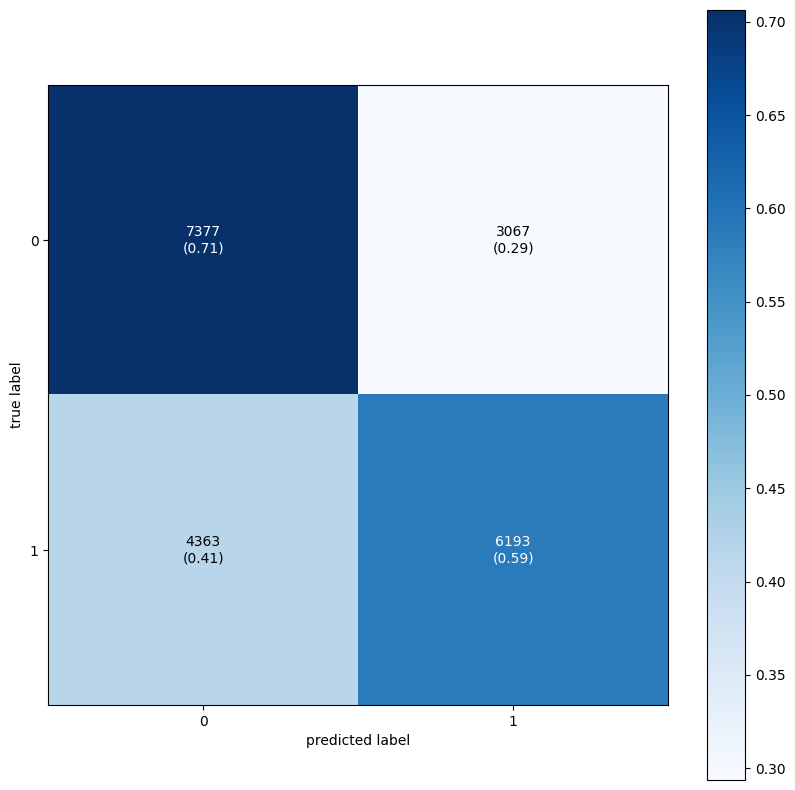

In [36]:
print('\n')
print("confusion matrix")
print('\n')
CM_SVM=confusion_matrix(y_test, y_pred_SVM)
print(CM_SVM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_SVM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [37]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_SVM=classification_report(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.63      0.71      0.67     10444
           1       0.67      0.59      0.63     10556

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.64     21000





**ROC CURVE**

In [38]:
from sklearn.metrics import roc_curve, auc

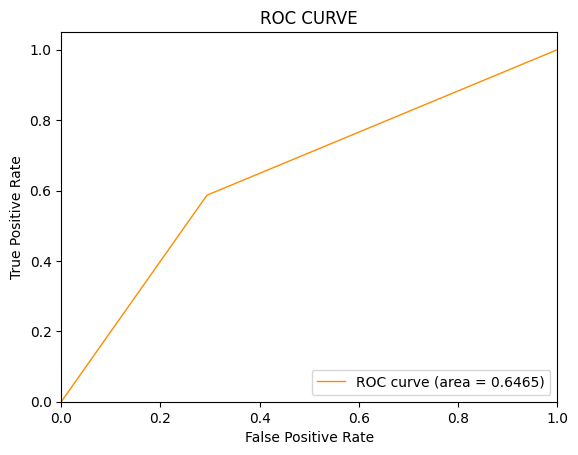

In [39]:
fpr_SVM, tpr_SVM, thresholds = roc_curve(y_test, y_pred_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_SVM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.4-Logistic Regression(LR)**

In [40]:
import sklearn.linear_model

# Create an instance of the LogisticRegression class
logistic_regression = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=1.0)

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Predict the labels of new data
y_pred = logistic_regression.predict(X_test)

### **Model Training**

In [41]:
from sklearn.linear_model import LogisticRegression


In [42]:
LR= LogisticRegression(solver='lbfgs', C=1.0)
LR_Model= LR.fit(X_train , y_train)
LR_Model

LogisticRegression()

### **Model Evaluation**

**Predict Class Probability**

In [43]:
preds_proba = LR_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.5192104  0.4807896 ]
 [0.57892298 0.42107702]
 [0.53276102 0.46723898]
 ...
 [0.39937167 0.60062833]
 [0.48043738 0.51956262]
 [0.32763829 0.67236171]]


**Accuracy**

In [44]:
y_pred_LR = LR.predict(X_test)
LR_Acc=LR_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR_Model.score(X_test, y_test)))

Accuracy score= 0.6473


**Confusion Matrix**

In [45]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


              precision    recall  f1-score   support

           0       0.68      0.80      0.73     10444
           1       0.76      0.62      0.68     10556

    accuracy                           0.71     21000
   macro avg       0.72      0.71      0.71     21000
weighted avg       0.72      0.71      0.71     21000





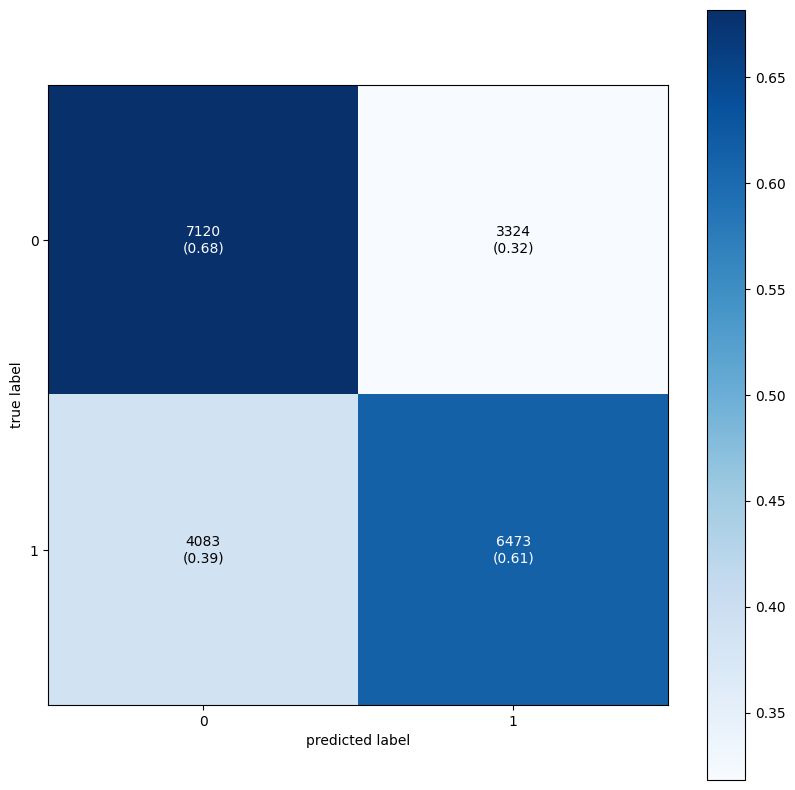

In [46]:
print('\n')
print("confusion matrix")
print('\n')
CM_LR=confusion_matrix(y_test, y_pred_LR)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [47]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LR=classification_report(y_test, y_pred_LR)
print(CR_LR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.64      0.68      0.66     10444
           1       0.66      0.61      0.64     10556

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000





**ROC CURVE**

In [48]:
from sklearn.metrics import roc_curve, auc

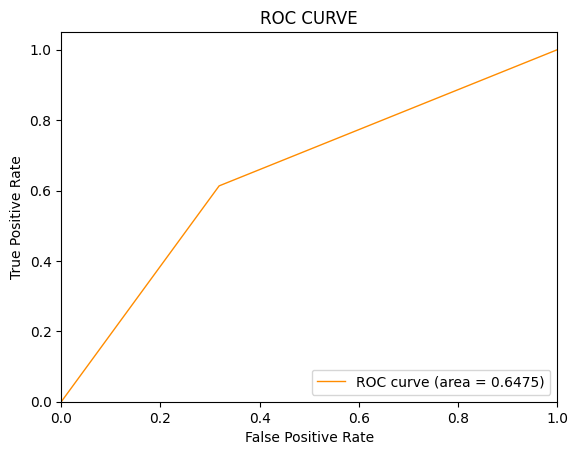

In [49]:
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_pred_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.5 KNN Algorithm**

### **Model Training**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN_Model= KNN.fit(X_train , y_train)
KNN_Model

KNeighborsClassifier()

### **Model Evaluation**

**Predict Class Probability**

In [51]:
preds_proba = KNN_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.6 0.4]
 [0.4 0.6]
 [0.4 0.6]
 ...
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]]


**Accuracy**

In [52]:
y_pred_KNN = KNN.predict(X_test)
KNN_Acc=KNN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN_Model.score(X_test, y_test)))

Accuracy score= 0.5984


**Confusion Matrix**

In [53]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[6319 4125]
 [4309 6247]]




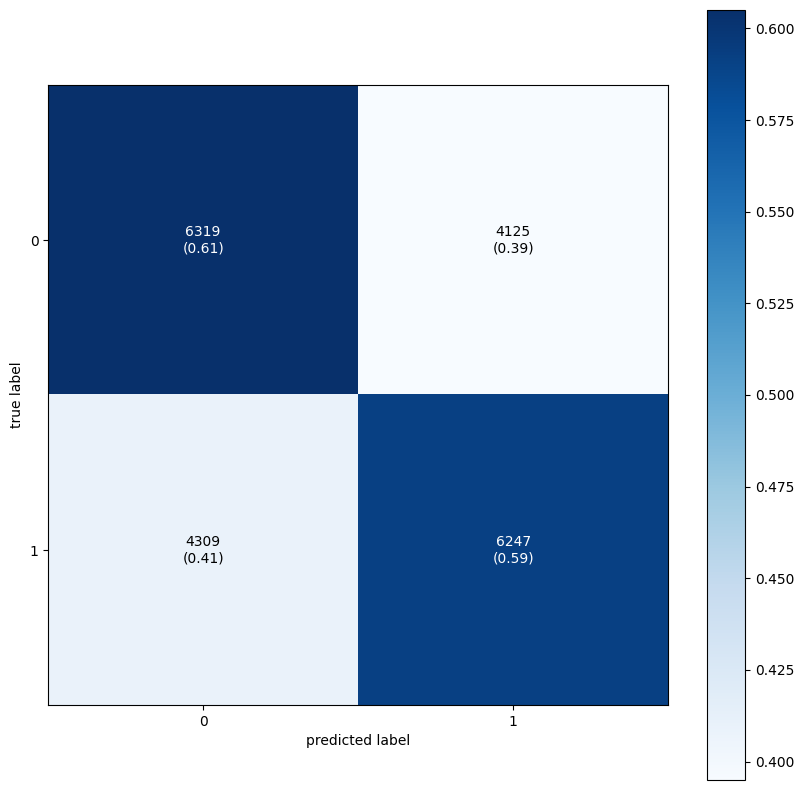

In [54]:
print('\n')
print("confusion matrix")
print('\n')
CM_KNN=confusion_matrix(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_KNN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [55]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_KNN=classification_report(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.59      0.61      0.60     10444
           1       0.60      0.59      0.60     10556

    accuracy                           0.60     21000
   macro avg       0.60      0.60      0.60     21000
weighted avg       0.60      0.60      0.60     21000





**ROC CURVE**

In [56]:
from sklearn.metrics import roc_curve, auc

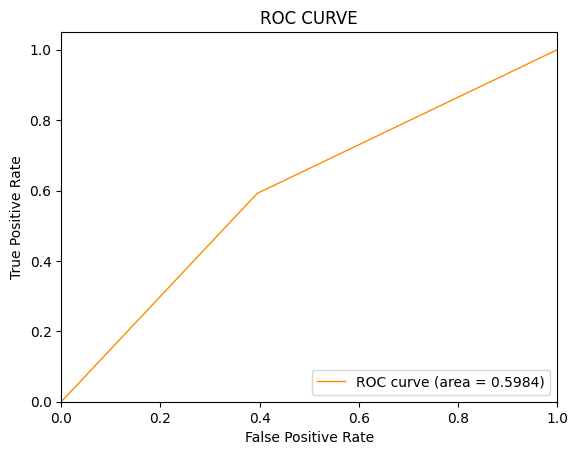

In [57]:
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, y_pred_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_KNN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.6-Naive Bayes (NB)**

### **Modle Training**

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [60]:

NB = GaussianNB()
NB_Model= NB.fit(X_train , y_train)
NB_Model

GaussianNB()

### **Model Evaluation**

**Predict Class Probability**

In [61]:
preds_proba = NB_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.93231152 0.06768848]
 [0.96781177 0.03218823]
 [0.94448975 0.05551025]
 ...
 [0.92100825 0.07899175]
 [0.95490066 0.04509934]
 [0.72846464 0.27153536]]


**Accuracy**

In [62]:
y_pred_NB = NB_Model.predict(X_test)
NB_Acc=NB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NB_Model.score(X_test, y_test)))

Accuracy score= 0.5846


**Confusion Matrix**

In [63]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[9656  788]
 [7935 2621]]




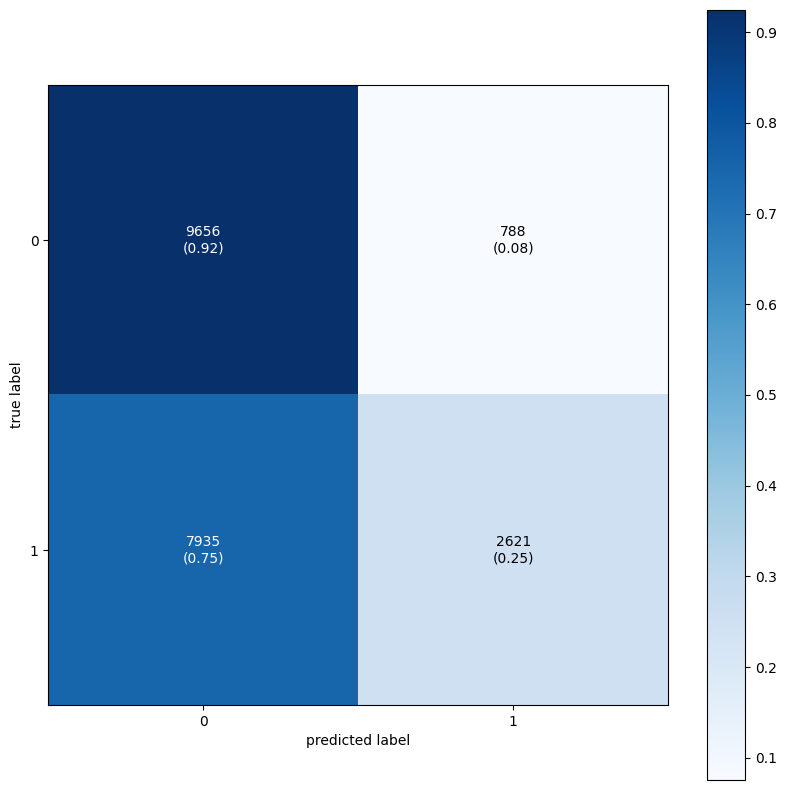

In [64]:
print('\n')
print("confusion matrix")
print('\n')
CM_NB=confusion_matrix(y_test, y_pred_NB)
print(CM_NB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [65]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NB=classification_report(y_test, y_pred_NB)
print(CM_NB)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.55      0.92      0.69     10444
           1       0.77      0.25      0.38     10556

    accuracy                           0.58     21000
   macro avg       0.66      0.59      0.53     21000
weighted avg       0.66      0.58      0.53     21000





**ROC CURVE**

In [66]:
from sklearn.metrics import roc_curve, auc


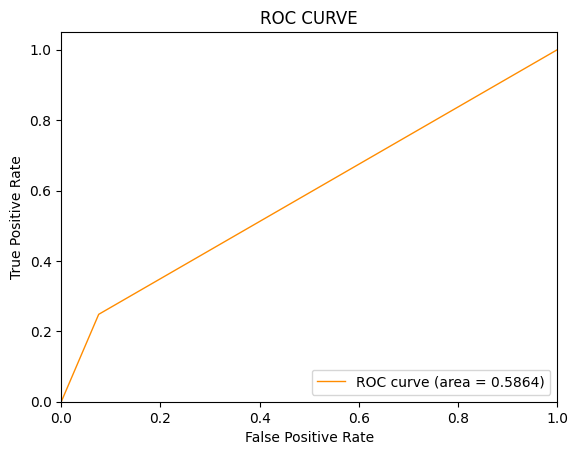

In [67]:
fpr_NB, tpr_NB, thresholds = roc_curve(y_test, y_pred_NB)
roc_auc_NB = auc(fpr_NB, tpr_NB)
plt.figure()
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.7- Deep Neural Multilayer Perceptron (MLP)**

### **Model Training**

In [68]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='adam', activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,100,100,100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True,
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
NN_Model= NN.fit(X_train , y_train)
NN_Model

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100, 100),
              max_iter=1000)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
estimator = MLPClassifier()
param_grid = {'activation': ['identity', 'logistic', 'tanh'], 'hidden_layer_sizes': [(100, ), (200, ), (300, )]}
gscv = GridSearchCV(estimator, param_grid, cv=5)

In [ ]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(100,), (200,), (300,)]})

In [ ]:
best_params = gscv.best_params_
best_score = gscv.best_score_

In [ ]:
best_estimator = gscv.best_estimator_
best_estimator.fit(X_train, y_train)

MLPClassifier(activation='tanh')

In [ ]:
y_pred = best_estimator.predict(X_test)

### **Model Evulation**

**Predict Class Probability**

In [70]:
preds_proba = NN_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.2288456  0.7711544 ]
 [0.65809389 0.34190611]
 [0.69901061 0.30098939]
 ...
 [0.44905192 0.55094808]
 [0.62490802 0.37509198]
 [0.49895626 0.50104374]]


**Accuracy**

In [71]:
y_pred_NN = NN.predict(X_test)
NN_Acc=NN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NN_Model.score(X_test, y_test)))

Accuracy score= 0.7285


**Confusion Matrix**

In [72]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[8063 2381]
 [3320 7236]]




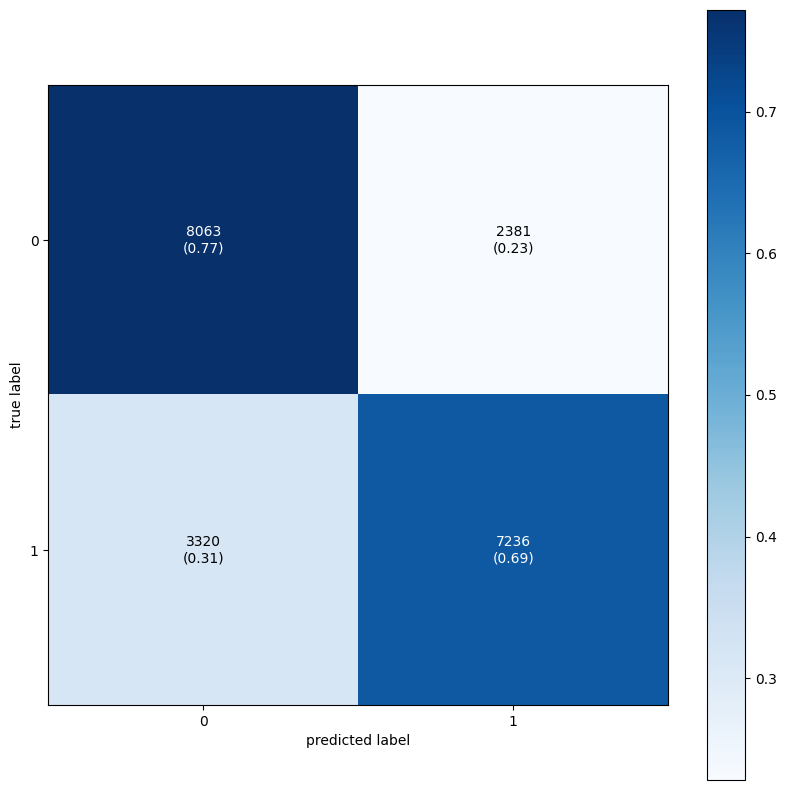

In [73]:
print('\n')
print("confusion matrix")
print('\n')
CM_NN=confusion_matrix(y_test, y_pred_NN)
print(CM_NN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [74]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NN=classification_report(y_test, y_pred_NN)
print(CM_NN)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10444
           1       0.75      0.69      0.72     10556

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000





**ROC CURVE**

In [75]:
from sklearn.metrics import roc_curve, auc

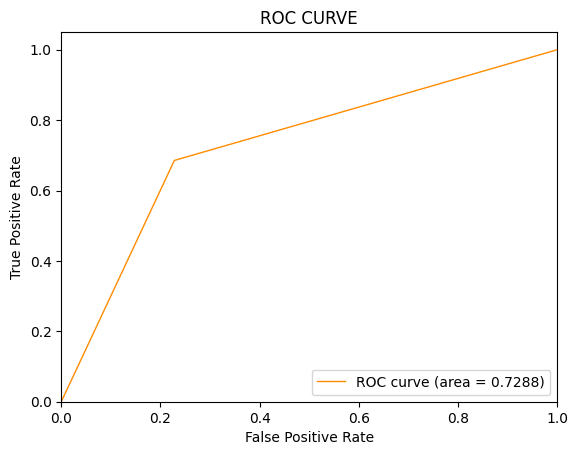

In [76]:
fpr_NN, tpr_NN, thresholds = roc_curve(y_test, y_pred_NN)
roc_auc_NN = auc(fpr_NN, tpr_NN)
plt.figure()
plt.plot(fpr_NN, tpr_NN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.8- XGBoost or Gradient Boosting (GB)**

### **Model Training**

In [77]:
from xgboost import XGBClassifier
GB=XGBClassifier()
GB_Model= GB.fit(X_train , y_train)
GB_Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### **Model Evaluation**

**Predict Class Probability**

In [78]:
preds_proba = GB_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.19078463 0.80921537]
 [0.59601176 0.40398827]
 [0.52264965 0.47735038]
 ...
 [0.2727859  0.7272141 ]
 [0.55342066 0.4465793 ]
 [0.39013046 0.60986954]]


**Accuracy**

In [79]:
y_pred_GB = GB.predict(X_test)
GB_Acc=GB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(GB_Model.score(X_test, y_test)))

Accuracy score= 0.7305


**Confusion Matrix**

In [80]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix



confusion matrix


[[8081 2363]
 [3296 7260]]




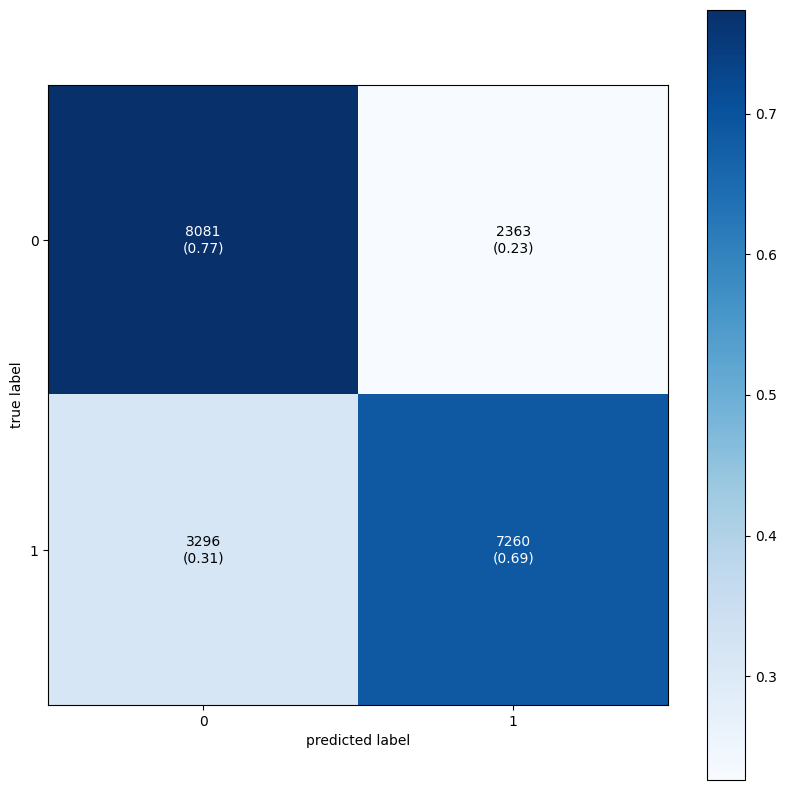

In [81]:
print('\n')
print("confusion matrix")
print('\n')
CM_GB=confusion_matrix(y_test, y_pred_GB)
print(CM_GB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_GB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [82]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_GB=classification_report(y_test, y_pred_GB)
print(CR_GB)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10444
           1       0.75      0.69      0.72     10556

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000





**ROC CURVE**

In [83]:
from sklearn.metrics import roc_curve, auc

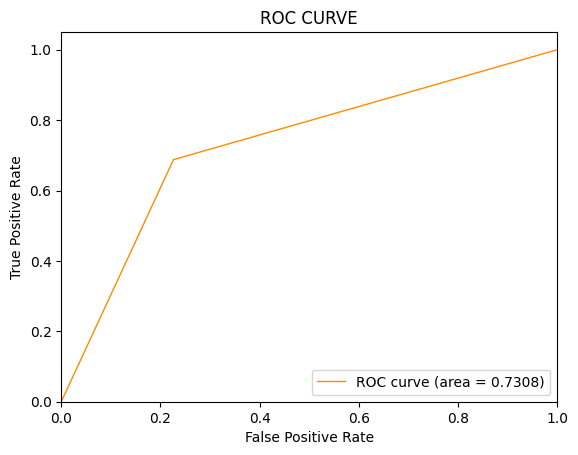

In [84]:
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, y_pred_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)
plt.figure()
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_GB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 11.9 **ExtraTreeClassifier(ET)**

### **Model Training**

In [85]:
from sklearn.tree import ExtraTreeClassifier
ET=ExtraTreeClassifier(random_state=0, max_depth=2)
ET_model= ET.fit(X_train , y_train)
ET_model

ExtraTreeClassifier(max_depth=2, random_state=0)

### **Model evaluation**

**Predict Class Probability**

In [86]:
preds_proba = ET_model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.54684077 0.45315923]
 [0.54684077 0.45315923]
 [0.54684077 0.45315923]
 ...
 [0.49512874 0.50487126]
 [0.54684077 0.45315923]
 [0.54684077 0.45315923]]


**Accuracy**

In [87]:
y_pred_ET = ET_model.predict(X_test)
ET_Acc=ET_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(ET_model.score(X_test, y_test)))

Accuracy score= 0.5658


**Confusion Matrix**





confusion matrix


[[8148 2296]
 [6822 3734]]




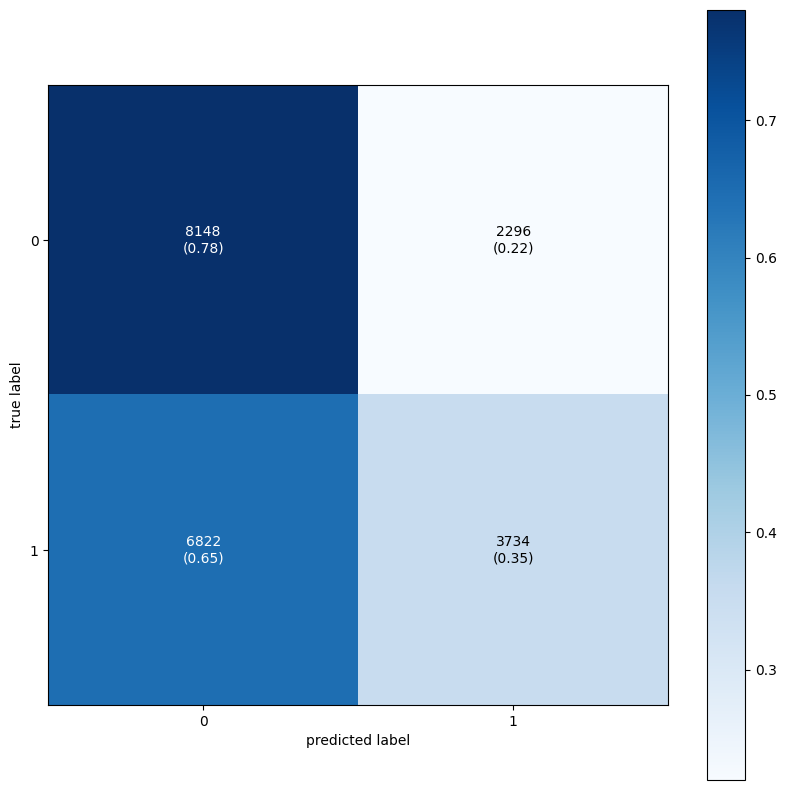

In [88]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_ET=confusion_matrix(y_test, y_pred_ET)
print(CM_ET)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_ET,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

**Precision, Recall, F1**

In [89]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_ET=classification_report(y_test, y_pred_ET)
print(CR_ET)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.54      0.78      0.64     10444
           1       0.62      0.35      0.45     10556

    accuracy                           0.57     21000
   macro avg       0.58      0.57      0.55     21000
weighted avg       0.58      0.57      0.55     21000





**ROC CURVE**



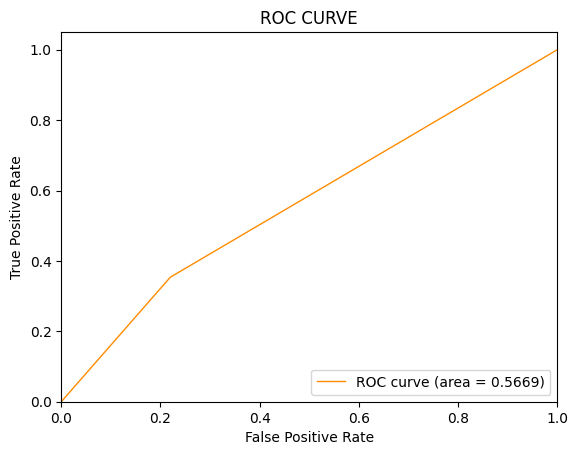

In [90]:
from sklearn.metrics import roc_curve, auc
fpr_ET, tpr_ET, thresholds = roc_curve(y_test, y_pred_ET)
roc_auc_ET = auc(fpr_ET, tpr_ET)
plt.figure()
plt.plot(fpr_ET, tpr_ET, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_ET)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.10 LGBMClassifier**

### **Model Training**

In [91]:
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(objective="binary", n_estimators=10)
LGBM_model= LGBM.fit(X_train , y_train)
LGBM_model

[LightGBM] [Info] Number of positive: 24423, number of negative: 24577
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498429 -> initscore=-0.006286
[LightGBM] [Info] Start training from score -0.006286


LGBMClassifier(n_estimators=10, objective='binary')

### **Model evaluation**

**Predict Class Probability**

In [92]:
preds_proba = LGBM_model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.2932699  0.7067301 ]
 [0.59787    0.40213   ]
 [0.63343003 0.36656997]
 ...
 [0.45265394 0.54734606]
 [0.52962706 0.47037294]
 [0.48585182 0.51414818]]



**Accuracy**

In [93]:
y_pred_LGBM = LGBM_model.predict(X_test)
LGBM_Acc=LGBM_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LGBM_model.score(X_test, y_test)))

Accuracy score= 0.7305


**Confusion Matrix**





confusion matrix


[[8346 2098]
 [3562 6994]]




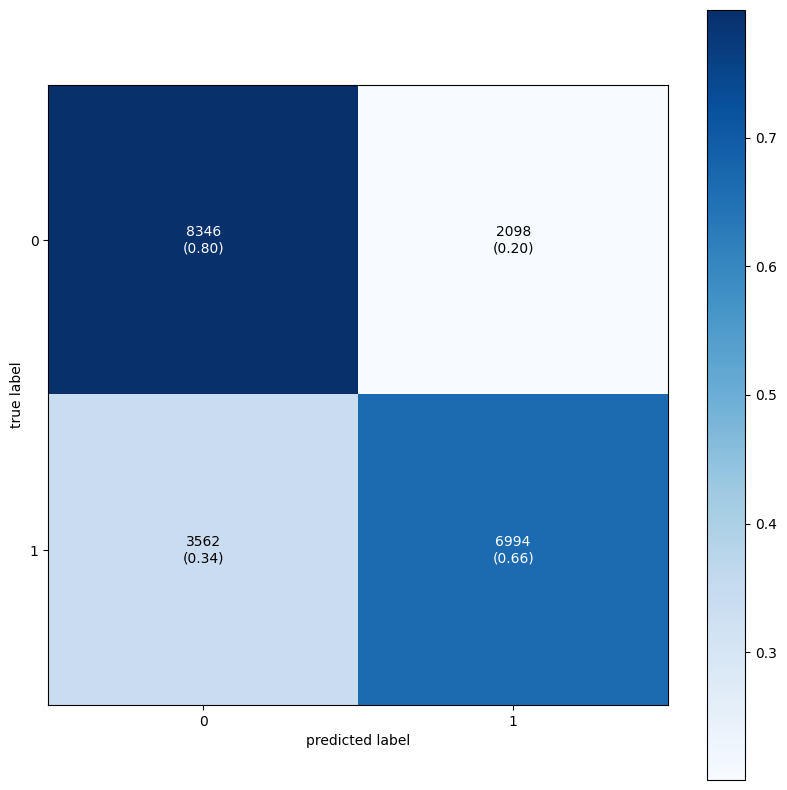

In [94]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_LGBM=confusion_matrix(y_test, y_pred_LGBM)
print(CM_LGBM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LGBM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [95]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LGBM=classification_report(y_test, y_pred_LGBM)
print(CR_LGBM)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10444
           1       0.77      0.66      0.71     10556

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000





**ROC CURVE**



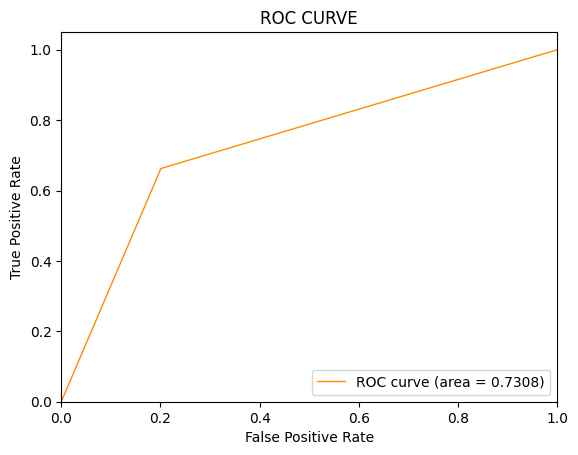

In [96]:
from sklearn.metrics import roc_curve, auc
fpr_LGBM, tpr_LGBM, thresholds = roc_curve(y_test, y_pred_LGBM)
roc_auc_LGBM = auc(fpr_LGBM, tpr_LGBM)
plt.figure()
plt.plot(fpr_LGBM, tpr_LGBM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LGBM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.11 CatBoost**

### **Model Training**


In [97]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


In [98]:

from catboost import CatBoostClassifier, Pool

In [99]:

#CTB = CatBoost(params={'iterations':100, 'verbose':10, 'loss_function':'Logloss'})
CTB= CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

CTB_Model= CTB.fit(X_train , y_train)
CTB_Model

0:	learn: 0.5837756	total: 52.9ms	remaining: 52.9ms
1:	learn: 0.5651702	total: 57.5ms	remaining: 0us


### **Model evaluation**


**Predict Class Probability**

In [100]:
preds_class = CTB_Model.predict(X_test)
preds_proba = CTB_Model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [1 0 0 ... 0 0 1]
proba =  [[0.18166365 0.81833635]
 [0.64759936 0.35240064]
 [0.78469648 0.21530352]
 ...
 [0.64759936 0.35240064]
 [0.64759936 0.35240064]
 [0.23072208 0.76927792]]


**Accuracy**



In [101]:

y_pred_CTB = CTB_Model.predict(X_test)
CTB_Acc=CTB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(CTB_Model.score(X_test, y_test)))

Accuracy score= 0.7217


**Confusion Matrix**





confusion matrix


[[8084 2360]
 [3485 7071]]




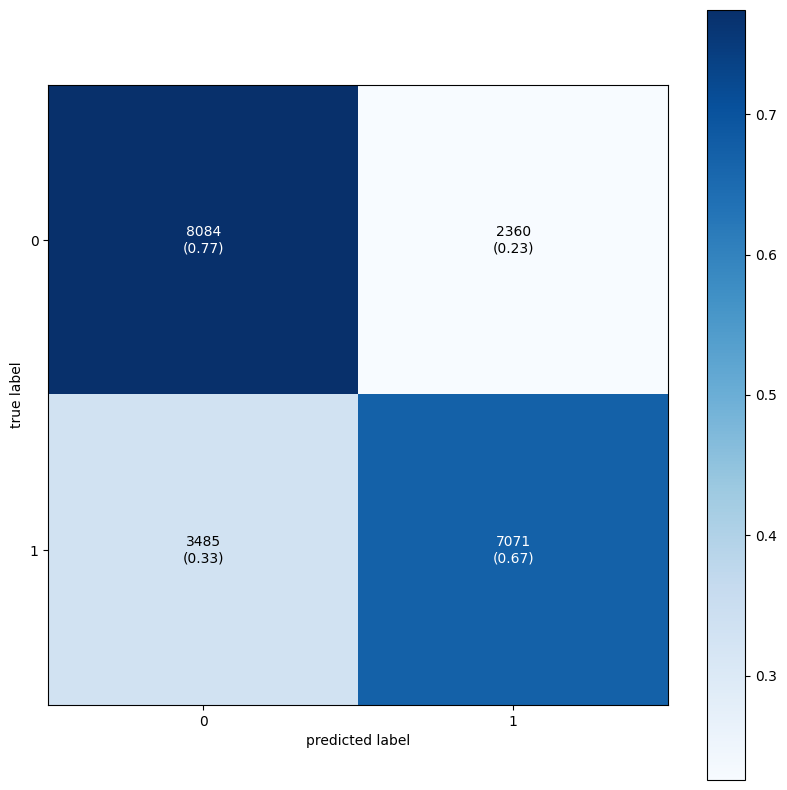

In [102]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_CTB=confusion_matrix(y_test, y_pred_CTB)
print(CM_CTB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_CTB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [103]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_CTB=classification_report(y_test, y_pred_CTB)
print(CR_CTB)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.70      0.77      0.73     10444
           1       0.75      0.67      0.71     10556

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000





**ROC CURVE**



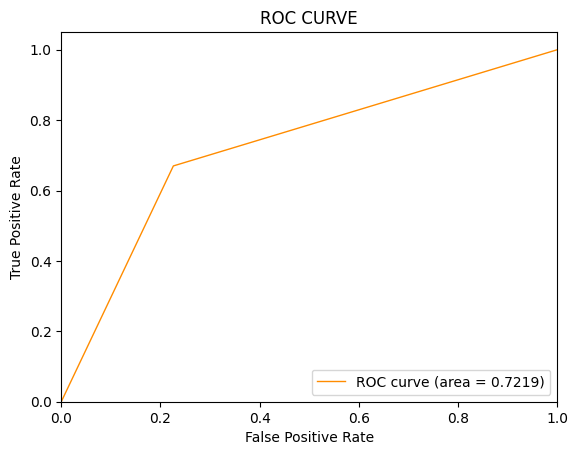

In [104]:
from sklearn.metrics import roc_curve, auc
fpr_CTB, tpr_CTB, thresholds = roc_curve(y_test, y_pred_CTB)
roc_auc_CTB = auc(fpr_CTB, tpr_CTB)
plt.figure()
plt.plot(fpr_CTB, tpr_CTB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_CTB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **12-Compare Modle performance**

## **12.1-ROC Curve for Models**

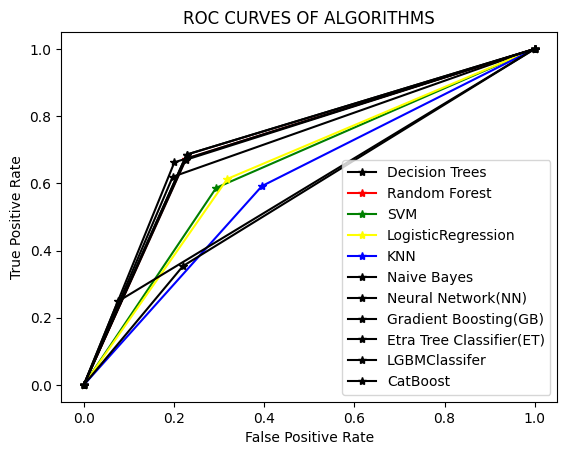

In [105]:
plt.plot(fpr_DT, tpr_DT, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr_RF, tpr_RF, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr_SVM, tpr_SVM, marker='*', label='SVM', color = 'green')
plt.plot(fpr_LR, tpr_LR, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr_KNN, tpr_KNN, marker='*', label='KNN', color = 'blue')
plt.plot(fpr_NB, tpr_NB, marker='*', label='Naive Bayes', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Neural Network(NN)', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Gradient Boosting(GB)', color = 'black')
plt.plot(fpr_ET, tpr_ET, marker='*', label='Etra Tree Classifier(ET)', color = 'black')
plt.plot(fpr_LGBM, tpr_LGBM, marker='*', label='LGBMClassifer', color = 'black')
plt.plot(fpr_CTB, tpr_CTB, marker='*', label='CatBoost', color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **12.2-Comparison of all algorithms Results**

In [106]:
from prettytable import PrettyTable

In [107]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(DT_Acc,4)])
x.add_row(["Random Forest Algorithm", round(RF_Acc,4)])
x.add_row(["Support Vector Machine Algorithm", round(SVM_Acc,4)])
x.add_row(["LogisticRegression Algorithm", round(LR_Acc,4)])
x.add_row(["KNN Algorithm", round(KNN_Acc,4)])
x.add_row(["Naive Bayes", round(NB_Acc,4)])
x.add_row(["Neural Network", round(NN_Acc,4)])
x.add_row(["Gradient Boosting", round(GB_Acc,4)])
x.add_row(["ExtraTree Classifer ", round(ET_Acc,4)])
x.add_row(["LGBM Classifier ", round(LGBM_Acc,4)])
x.add_row(["CatBoost ", round(CTB_Acc,4)])
print(x)
print('\n')



Comparison of all algorithm results
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|     Decision Trees Algorithm     |  0.7107  |
|     Random Forest Algorithm      |  0.723   |
| Support Vector Machine Algorithm |  0.6462  |
|   LogisticRegression Algorithm   |  0.6473  |
|          KNN Algorithm           |  0.5984  |
|           Naive Bayes            |  0.5846  |
|          Neural Network          |  0.7285  |
|        Gradient Boosting         |  0.7305  |
|       ExtraTree Classifer        |  0.5658  |
|         LGBM Classifier          |  0.7305  |
|            CatBoost              |  0.7217  |
+----------------------------------+----------+




# **References**


[1- Scikit-Learn - Ensemble Learning : Bootstrap Aggregation(Bagging) & Random Forests](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-ensemble-learning-bagging-and-random-forests#2.4)

[2- Scikit-Learn - Decision Trees](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-decision-trees#2)

[3- Deep Neural Multilayer Perceptron (MLP) with Scikit-learn](https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e)

[4- Akramz
/
Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow
Public](https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow)

[5- XGBoost hyperparameter tuning in Python using grid search](https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/)

[6- KNN Classifier in Sklearn using GridSearchCV with Example](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/)

[7-Decision Tree Classifier in Python Sklearn with Example](https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/)

[8- Introducing Trelawney : a unified Python API for interpretation of Machine Learning Models](https://medium.com/analytics-vidhya/introducing-trelawney-a-unified-python-api-for-interpretation-of-machine-learning-models-6fbc0a1fd6e7)

[9-Titanic: explaining predictions with Trelawney](https://www.kaggle.com/aredier/titanic-explaining-predictions-with-trelawney)

[10-Yellowbrick; Machine Learning Visualization-need to implement](https://hersanyagci.medium.com/yellowbrick-machine-learning-visualization-a8c2e9cae78e)

[11-Scikit-Learn (Python): 6 Useful Tricks for Data Scientists](https://levelup.gitconnected.com/scikit-learn-python-6-useful-tricks-for-data-scientists-1a0a502a6aa3)

[12-Machine Learning Bagging](https://medium.com/fintechexplained/machine-learning-bagging-6c0c2d002595)

[13-Let’s Talk About Machine Learning Ensemble Learning In Python](https://medium.com/fintechexplained/lets-talk-about-machine-learning-ensemble-learning-in-python-382747e5fba8)

[14-Making Machine Learning Models Interpretable](https://medium.com/bitgrit-data-science-publication/making-machine-learning-models-interpretable-3f9efcf64a9)

[15-Simple Linear Regression](https://towardsdatascience.com/simple-linear-regression-35b3d940950e)

[16-10 Regression Metrics Data Scientist Must Know (Python-Sklearn Code Included)](https://medium.com/@tzjy/10-regression-metrics-data-scientist-must-know-python-code-included-c6ca40320504)

[17-Regression Algorithm to Predict House Prices in Python](https://pub.towardsai.net/regression-algorithm-to-predict-house-prices-in-python-7722f2d76548)

[18-data-science-complete-tutoria](https://github.com/edyoda/data-science-complete-tutorial/blob/master/4.%20Linear%20Models%20for%20Classification%20%26%20Regression.ipynb)

[19-How to ace machine learning hyperparameter optimization](https://medium.com/analytics-vidhya/how-to-ace-machine-learning-hyperparameter-optimization-78763c97db1)

[20-Sklearn-genetic-opt](https://github.com/rodrigo-arenas/Sklearn-genetic-opt)

[21-What is CatBoost Algorithm? Step-by-Step Tutorial](https://dhavalthakur.medium.com/what-is-catboost-algorithm-step-by-step-tutorial-2c93aa566068)

[22-1.11. Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

[23-Stacking made easy with Sklearn](https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b)

[Gradient Boosting with Scikit-Learn, XGBoost, LightGBM, and CatBoost](https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/)

[New ML algorithms developed by Facebook](https://www.reddit.com/r/MachineLearning/comments/it44ix/r_new_ml_algorithms_developed_by_facebook/)

[An Introduction To Decision Trees and Predictive Analytics](https://towardsdatascience.com/an-introduction-to-decision-trees-and-predictive-analytics-92924a8a77e7)


[What is CatBoost Algorithm? Step-by-Step Tutorial](https://dhavalthakur.medium.com/what-is-catboost-algorithm-step-by-step-tutorial-2c93aa566068)

[Important Links of Articles in Data Science and Deep Learning](https://amitprius.medium.com/important-links-of-articles-in-data-science-and-deep-learning-7b577559d4d1)

[4 Metrics to Evaluate your Regression Models](https://towardsdatascience.com/4-metrics-to-evaluate-your-regression-models-885e9caeee57)

[handson-ml](https://github.com/ageron/handson-ml)

[Regression and Classification Metrics in Machine learning with Python](https://pub.towardsai.net/regression-and-classification-metrics-in-machine-learning-with-python-6d9fcd8b73aa)

[All Machine Learning Algorithms You Should Know in 2022](https://towardsdatascience.com/all-machine-learning-algorithms-you-should-know-in-2022-db5b4ccdf32f)

[Fully Explained K-Nearest Neighbors with Python](https://pub.towardsai.net/fully-explained-k-nearest-neighbors-with-python-ebbe27f93ba9)

[10 Regression Metrics Data Scientist Must Know (Python-Sklearn Code Included)](https://medium.com/@tzjy/10-regression-metrics-data-scientist-must-know-python-code-included-c6ca40320504)

[How Linear Regression Actually work (Maths In-depth Intuition)- Part 2](https://pub.towardsai.net/how-linear-regression-actually-work-maths-in-depth-intuition-part-2-c49a8db03013)

[ML-Ensembles-Methods](https://github.com/Davisy/ML-Ensembles-Methods)

[Parallelized Ensemble Learning Using Python](https://medium.com/mlearning-ai/parallelized-ensemble-learning-using-python-23dc1fe04b3d)

[Introduction to Autoencoders for Anomaly Detection](https://medium.com/artificialis/introduction-to-autoencoders-for-anomaly-detection-a9897591cc72)

[scikit-learn](https://scikit-learn.org/stable/)

[A Tour of Machine Learning Algorithms](https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/)

[95+ Machine Learning Algorithms & Models Explained with Python](https://medium.com/coders-camp/all-machine-learning-algorithms-models-explained-adcd95d5fb3c)

[Quick Recap : 60 days of Data Science and Machine Learning Series](https://medium.com/coders-mojo/quick-recap-60-days-of-data-science-and-machine-learning-series-457ca0e98279)

[Model Selection in Machine Learning](https://medium.com/@anushkhabajpai/model-selection-in-machine-learning-c568e5a42dcc)

[8 Booming Data Science Libraries You Must Watch Out For in 2022](https://towardsdatascience.com/8-booming-data-science-libraries-you-must-watch-out-in-2022-cec2dbb42437)

[Parallelized Ensemble Learning Using Python](https://medium.com/mlearning-ai/parallelized-ensemble-learning-using-python-23dc1fe04b3d)

[Explainable AI (XAI) — A guide to 7 Packages in Python to Explain Your Models](https://towardsdatascience.com/explainable-ai-xai-a-guide-to-7-packages-in-python-to-explain-your-models-932967f0634b)



